# Images

In [5]:
from PIL import Image
import numpy as np

```
wget https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Stourhead_garden.jpg/220px-Stourhead_garden.jpg
```

In [2]:
img = Image.open('landscape.jpg')

In [6]:
img_array = np.array(img)

In [7]:
img_array.shape

(147, 220, 3)

In [17]:
img_array[:5,:5,0]

array([[ 25,   0,   0,  12,   0],
       [ 19,  53, 109,   5,  53],
       [ 86,  85, 149, 109, 193],
       [ 58,  89, 179, 172, 211],
       [  0,  23,  23, 174, 207]], dtype=uint8)

In [18]:
img_array[:5,:5,1]

array([[ 36,   2,  12,  32,   4],
       [ 30,  64, 132,   9,  44],
       [101,  95, 168, 104, 169],
       [ 84, 106, 198, 180, 199],
       [ 11,  40,  35, 186, 203]], dtype=uint8)

In [19]:
img_array[:5,:5,2]

array([[ 19,  21,   0,   7,   0],
       [  0,  56,  52,   0,  15],
       [ 44,  70,  43,  36, 109],
       [  0,  52,  54,   0,  35],
       [  1,  24,   0,  42,  69]], dtype=uint8)

[RGB to Hex](https://www.rapidtables.com/convert/color/rgb-to-hex.html)

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

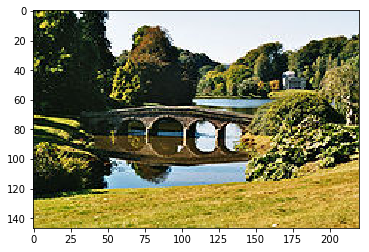

In [10]:
plt.imshow(img_array);

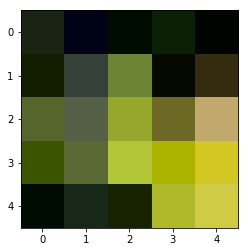

In [20]:
plt.imshow(img_array[:5,:5,:])

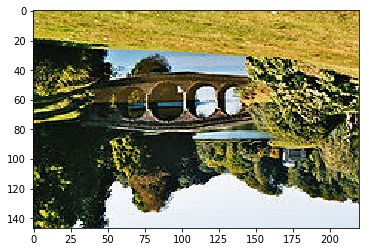

In [15]:
plt.imshow(img_array[::-1]);

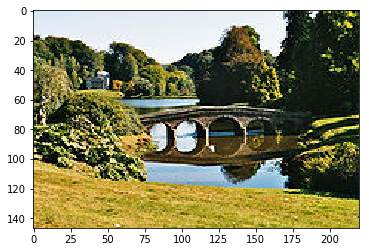

In [16]:
plt.imshow(img_array[:,::-1]);

In [25]:
np.min(img_array), np.max(img_array)

(0, 255)

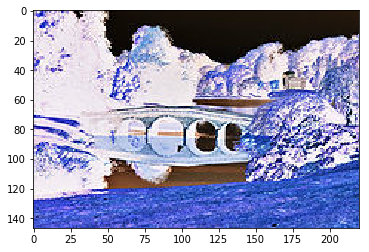

In [22]:
plt.imshow(255 - img_array);

In [27]:
masked = np.where(img_array > 50, 255, 0)

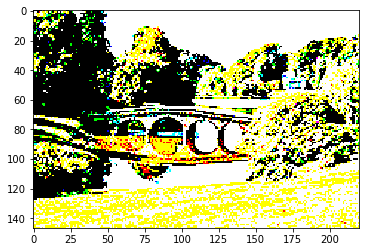

In [28]:
plt.imshow(masked);

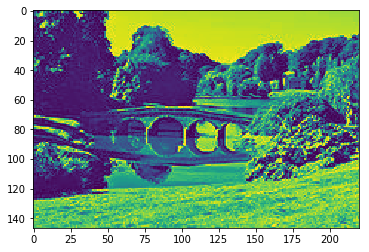

In [41]:
plt.imshow(img_array[:,:,0]);

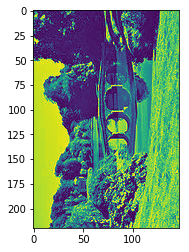

In [43]:
plt.imshow(img_array[:,:,0].T);

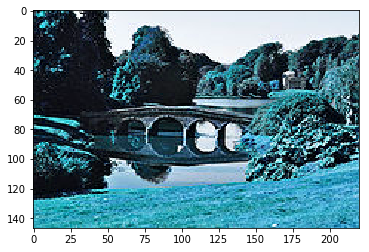

In [48]:
plt.imshow(np.sort(img_array, axis=2));

# [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist/blob/master/README.md)

In [10]:
from keras.datasets import fashion_mnist

In [12]:
(X_trn, y_trn), (X_tst, y_tst) = fashion_mnist.load_data()

In [13]:
X_trn.shape, X_tst.shape

((60000, 28, 28), (10000, 28, 28))

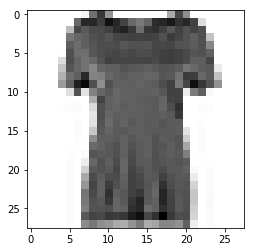

In [28]:
plt.imshow(X_trn[10], cmap='gray_r');

In [14]:
X_trn_flat = X_trn.reshape(len(X_trn), -1) / 255
X_tst_flat = X_tst.reshape(len(X_tst), -1) / 255

In [15]:
X_trn_flat.shape, X_tst_flat.shape

((60000, 784), (10000, 784))

In [122]:
%%time
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=20, n_estimators=40, n_jobs=-1)
model.fit(X_trn_flat, y_trn)

CPU times: user 1min 38s, sys: 981 ms, total: 1min 39s
Wall time: 38 s


In [123]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_tst_flat)
accuracy_score(y_tst, y_pred)

0.8067

In [36]:
%%time
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(n_jobs=-1, tol=1e-2)
model.fit(X_trn_flat, y_trn)

CPU times: user 12.7 s, sys: 64.8 ms, total: 12.8 s
Wall time: 4.5 s


In [37]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_tst_flat)
accuracy_score(y_tst, y_pred)

0.799

# Keras

In [51]:
import numpy as np

In [39]:
(X_trn, y_trn), (X_tst, y_tst) = fashion_mnist.load_data()

In [38]:
X_trn.shape, X_tst.shape

((60000, 28, 28), (10000, 28, 28))

In [42]:
X_trn = X_trn[..., None]
X_tst = X_tst[..., None]
X_trn.shape, X_tst.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [43]:
input_shape = X_trn[0].shape
input_shape

(28, 28, 1)

In [53]:
num_classes = len(np.unique(y_trn))
num_classes

10

<img src="https://cdn-images-1.medium.com/max/1600/1*_l-0PeSh3oL2Wc2ri2sVWA.png"/>

In [55]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

In [124]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape, 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [125]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [126]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                51264     
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
__________

In [101]:
import keras

In [72]:
y_trn.shape, y_tst.shape

((60000,), (10000,))

In [73]:
y_trn = keras.utils.to_categorical(y_trn)
y_tst = keras.utils.to_categorical(y_tst)
y_trn.shape, y_tst.shape

((60000, 10), (10000, 10))

In [ ]:
model.fit(X_trn, y_trn, batch_size=32, epochs=5, verbose=1,
          validation_data=(X_tst, y_tst))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 53s 879us/step - loss: 1.3343 - acc: 0.7166 - val_loss: 0.4689 - val_acc: 0.8221
Epoch 2/5
60000/60000 [==============================] - 48s 806us/step - loss: 0.4931 - acc: 0.8219 - val_loss: 0.4081 - val_acc: 0.8489
Epoch 3/5
24736/60000 [===========>..................] - ETA: 27s - loss: 0.4573 - acc: 0.8313

In [ ]:
model.fit(X_trn, y_trn, batch_size=32, epochs=5, verbose=1,
          validation_data=(X_tst, y_tst))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 50s 834us/step - loss: 0.3737 - acc: 0.8633 - val_loss: 0.3547 - val_acc: 0.8667
Epoch 2/5
60000/60000 [==============================] - 49s 819us/step - loss: 0.3596 - acc: 0.8685 - val_loss: 0.3524 - val_acc: 0.8753
Epoch 3/5
14208/60000 [======>.......................] - ETA: 33s - loss: 0.3605 - acc: 0.8653

In [74]:
model.fit(X_trn, y_trn, batch_size=128, epochs=5, verbose=1,
          validation_data=(X_tst, y_tst))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 50s 839us/step - loss: 2.2783 - acc: 0.5866 - val_loss: 0.5511 - val_acc: 0.7941
Epoch 2/5
60000/60000 [==============================] - 47s 787us/step - loss: 0.6504 - acc: 0.7620 - val_loss: 0.4466 - val_acc: 0.8352
Epoch 3/5
60000/60000 [==============================] - 54s 895us/step - loss: 0.5327 - acc: 0.8052 - val_loss: 0.4113 - val_acc: 0.8467
Epoch 4/5
60000/60000 [==============================] - 53s 879us/step - loss: 0.4629 - acc: 0.8306 - val_loss: 0.3791 - val_acc: 0.8618
Epoch 5/5
60000/60000 [==============================] - 46s 764us/step - loss: 0.4205 - acc: 0.8470 - val_loss: 0.3634 - val_acc: 0.8698


In [104]:
model.fit(X_trn, y_trn, batch_size=128, epochs=5, verbose=1,
          validation_data=(X_tst, y_tst))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 47s 785us/step - loss: 0.3892 - acc: 0.8572 - val_loss: 0.3465 - val_acc: 0.8792
Epoch 2/5
60000/60000 [==============================] - 46s 766us/step - loss: 0.3757 - acc: 0.8627 - val_loss: 0.3274 - val_acc: 0.8838
Epoch 3/5
60000/60000 [==============================] - 51s 843us/step - loss: 0.3532 - acc: 0.8708 - val_loss: 0.3259 - val_acc: 0.8836
Epoch 4/5
60000/60000 [==============================] - 48s 807us/step - loss: 0.3407 - acc: 0.8734 - val_loss: 0.3237 - val_acc: 0.8864
Epoch 5/5
60000/60000 [==============================] - 48s 797us/step - loss: 0.3279 - acc: 0.8788 - val_loss: 0.3178 - val_acc: 0.8924


In [106]:
model.fit(X_trn, y_trn, batch_size=128, epochs=5, verbose=1,
          validation_data=(X_tst, y_tst))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 47s 789us/step - loss: 0.3182 - acc: 0.8823 - val_loss: 0.3089 - val_acc: 0.8949
Epoch 2/5
60000/60000 [==============================] - 48s 803us/step - loss: 0.3123 - acc: 0.8833 - val_loss: 0.3208 - val_acc: 0.8870
Epoch 3/5
60000/60000 [==============================] - 49s 817us/step - loss: 0.3024 - acc: 0.8880 - val_loss: 0.3005 - val_acc: 0.8970
Epoch 4/5
60000/60000 [==============================] - 52s 859us/step - loss: 0.2911 - acc: 0.8903 - val_loss: 0.2942 - val_acc: 0.8982
Epoch 5/5
60000/60000 [==============================] - 51s 843us/step - loss: 0.2851 - acc: 0.8937 - val_loss: 0.3062 - val_acc: 0.8949


In [75]:
model.predict(X_tst[0:1])

array([[1.0151948e-12, 7.8109720e-16, 1.7538345e-16, 4.7644492e-14,
        1.3535119e-16, 4.1682058e-04, 1.9369260e-14, 1.1008844e-05,
        3.9093919e-11, 9.9957222e-01]], dtype=float32)

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [77]:
np.argmax(model.predict(X_tst[30:31]))

8

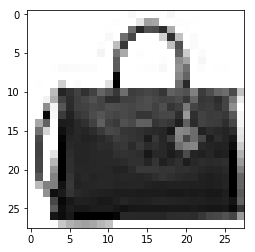

In [80]:
plt.imshow(X_tst[30][:,:,0], cmap='gray_r');

In [111]:
np.argmax(model.predict(X_tst), axis=1).shape

(10000,)

In [135]:
y_pred = np.argmax(model.predict(X_tst), axis=1)

In [136]:
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(y_tst, axis=1), y_pred)

0.8792

In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(y_tst, axis=1), y_pred)

0.8949

In [107]:
model.save('fashion_mnist_model_15e.hdf5')

In [103]:
from keras.models import load_model
loaded_model = load_model('fashion_mnist_model.hdf5')

In [85]:
np.argmax(loaded_model.predict(X_tst[50:51]))

6